<a href="https://colab.research.google.com/github/milleniaizzanch/Mini-Project/blob/main/MINI_PROJECT_NLP_AI_PROJECT_CYCLE_Chatbot_Pembelian_Tiket_Konser_Justin_Bieber_World_Tour_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS KELOMPOK 7
1. Kiran Cakra Prahazart Nuryama (Winning Eleven)
2. Dian krisnawati (winning eleven)
3. Suci Indah Sari (winning eleven) 
4. Aurora Rahyu Fasya (JumaTec)
5. Sitti Halimah (JumaTec)
6. Deko R. Putra (JumaTec)
7. Latifah Sari (Winning Eleven)
8. Millenia Izza Nurul Chasanah (JumaTec)

#AI PROJECT CYCLE - Chatbot Pembelian Tiket Konser Justin Bieber World Tour 2022




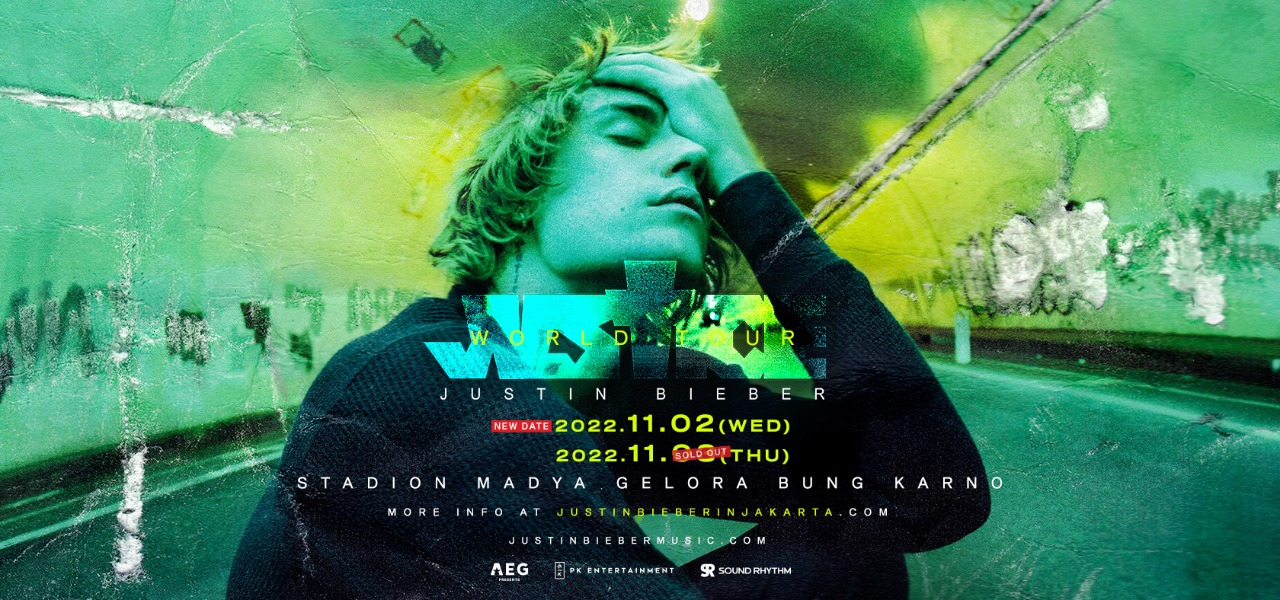

## Problem Scooping 

Justin Bieber baru saja mengumumkan akan menggelar konser di Indonesia setelah 11 Tahun. Banyak dari Belibers yang menunggu moment tersebut. Dengan tingginya antusias para Belibers menyambut konser Justice World Tour pada November nanti dikabarkan akan menjadi Tour Dunia terakhir JB. Karena hal tersebut kami berencana untuk membuat chatbot untuk membantu menjawab pertanyaan-pertanyaan seputar konser Justice World Tour - Justin Bieber.

Tiket Konser Justin Bieber ini hanya bisa di Akses atau dibeli melalui laman resmi atau aplikasi blibli. Adapun hal-hal yang bisa ditanyakan kepada chatbot ini adalah mengenai:
1. Harga dan Kategori Tiket
2. Tata cara Pembelian Tiket
3. Syarat dan Katentuan Konser - Tiket

#START

In [ ]:
!pip install gtts

In [ ]:
!pip install newspaper3k

     |████████████████████████████████| 211 kB 27.4 MB/s 
     |████████████████████████████████| 81 kB 9.9 MB/s 
     |████████████████████████████████| 87 kB 7.2 MB/s 
     |████████████████████████████████| 7.4 MB 50.7 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=23d0b1eb7b68715bee39aec9ce3ff94859bb1854b2720653643f4a4e67c0226b
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=f6cd5bffec36bd0f296265599a2193104a65cb0f2075035a54e2d9852be5f0f6
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=f08119fc8f9755374811cca34aa14be4bde86c5cb3188151ff8b9e40439b9e71
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a59795743

In [ ]:
# Import library
from newspaper import Article
import random
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import warnings
import re
warnings.filterwarnings('ignore')

from gtts import gTTS
import IPython.display as ipd
import time
from io import BytesIO

In [ ]:
nltk.download('punkt', quiet=True)

True

#DATA AKUSISI
##Proses 1

In [ ]:
#sumber materi : 
#https://hai.grid.id/read/073206812/beliebers-begini-cara-dapetin-tiket-konser-justin-bieber-di-jakarta-eksklusif-cuma-di-blibli?msclkid=04ede2dbaf5611ec92738183f0f59e28

In [ ]:
article_1 = Article('https://hai.grid.id/read/073206812/beliebers-begini-cara-dapetin-tiket-konser-justin-bieber-di-jakarta-eksklusif-cuma-di-blibli?msclkid=04ede2dbaf5611ec92738183f0f59e28')
article_1.download()
article_1.parse()
article_1.nlp()
corpus_1 = article_1.text
print(corpus_1)

Beliebers, Begini Cara Dapetin Tiket Konser Justin Bieber di Jakarta, Eksklusif Cuma di Blibli

Justin Bieber umumkan album keenamnya, Justice yang akan dirilis 19 Maret 2021 mendatang.

HAI-Online.com - Justin Bieber telah mengumumkan bahwa Jakarta resmi masuk ke dalam rangkaian Justice World Tour-nya tahun 2022 ini.

Yap, dengan begitu, belieber Indonesia bakal kembali disapa langsung oleh pelantun "Yummy" tersebut setelah pertemuan pada konser 2011 silam.

Pastinya juga, buat kamu yang mau membuat kenangan baru menyaksikan penampilan spektakuler dari penyanyi internasional berbakat ini, kalian nggak boleh melewatlan konser Bieber di Stadion Madya, Gelora Bung Karno Jakarta pada 3 November 2022.

Baca Juga: Klarifikasi Sebut Orang yang Belum Kena Covid-19 Mungkin karena Nggak Punya Teman, Wapres Langsung Hapus Postingan

Nah, dalam rangkaian tur ini, Blibli telah resmi ditunjuk untuk menjadi official e-commerce partner dalam Justice World Tour di Jakarta nanti.

Beliebers yang udah n

# DATA EKSPLORASI

## Proses 2 (Tokenization)

In [ ]:
# Tokenization
text = corpus_1
sentence_list= nltk.sent_tokenize(text) #A list of senetences

# Print the list of sentences
print(sentence_list)

['Beliebers, Begini Cara Dapetin Tiket Konser Justin Bieber di Jakarta, Eksklusif Cuma di Blibli\n\nJustin Bieber umumkan album keenamnya, Justice yang akan dirilis 19 Maret 2021 mendatang.', 'HAI-Online.com - Justin Bieber telah mengumumkan bahwa Jakarta resmi masuk ke dalam rangkaian Justice World Tour-nya tahun 2022 ini.', 'Yap, dengan begitu, belieber Indonesia bakal kembali disapa langsung oleh pelantun "Yummy" tersebut setelah pertemuan pada konser 2011 silam.', 'Pastinya juga, buat kamu yang mau membuat kenangan baru menyaksikan penampilan spektakuler dari penyanyi internasional berbakat ini, kalian nggak boleh melewatlan konser Bieber di Stadion Madya, Gelora Bung Karno Jakarta pada 3 November 2022.', 'Baca Juga: Klarifikasi Sebut Orang yang Belum Kena Covid-19 Mungkin karena Nggak Punya Teman, Wapres Langsung Hapus Postingan\n\nNah, dalam rangkaian tur ini, Blibli telah resmi ditunjuk untuk menjadi official e-commerce partner dalam Justice World Tour di Jakarta nanti.', 'Belie

## Proses 3 (Bot Response)

Bot respon digunakan untuk membuat sebuah percakapan awal antara pengguna dengan bot, jadi disini user dapat menyapa bot, nah untuk kata-kata dapat diganti sesuai dengan kebutuhan, misalnya bahasa indonesia. 

Pada percakapan awal tidak menggunakan ML atau metode lainnya, program hanya menjawab dengan kata yang di cocokkan sebagai input.

In [ ]:
#a function to return a random greeting response to a users greeting
def greeting_response(text):
    text = text.lower()
    
    #Bots greeting respone
    bot_greetings = ['howdy','hi','hello','hola', 'haihai', 'selamat datang, selamat belanja', 'hilow', 'hai', 'Halo']
    
    #Users greeting
    user_greetings = ['hi','hey','hello','greetings','wassup', 'permisi', 'hilow', 'hallo', 'Hai']
    
    for word in text.split():
        if word in user_greetings:
            return random.choice(bot_greetings)
        
    #Random response to greeting
    def gratitude_response(text):
        text=text.lower()

## Sorting List

In [ ]:
 def index_sort(list_var):
    length = len(list_var)
    list_index = list(range(0, length))
    
    x = list_var        
    for i in range(length):
        for j in range(length):
            if x[list_index[i]] > x[list_index[j]]:
                #swap
                temp = list_index[i]
                list_index[i] = list_index[j]
                list_index[j] = temp
                
    return list_index

#MODELING

## Chatbot Respon Menggunakan Cosine Similarity

Pada respon bot menggunakan teknis Cosine Similarity untuk menghitung kata yang cocok dengan yang di input user terhadap respon dari Bot

In [ ]:
# Creat Bots Response
def bot_response(user_input):
    user_input=user_input.lower()
    sentence_list.append(user_input)
    bot_response= ''
    cm=CountVectorizer().fit_transform(sentence_list)
    similarity_scores=cosine_similarity(cm[-1],cm)
    similarity_scores_list=similarity_scores.flatten()
    index=index_sort(similarity_scores_list)
    index=index[1:]
    response_flag=0
    
    j=0
    for i in range(len(index)):
        if similarity_scores_list[index[i]]>0.0:
            bot_response=bot_response+' '+sentence_list[index[i]]
            response_flag=1
            j=j+1
        if j>2:
            break

        if response_flag==0:
            bot_response=bot_response+" "+"Maaf, bisa diulangi?"

        sentence_list.remove(user_input) 

        return bot_response

## Proses 4 (End Process, Making chat box)

In [ ]:
print("JB Bot: hai, apakah ada yang bisa kami bantu?")

Harga_list=['harga tiket', 'kategori dan harga', 'hai, berapa harga tiket konser JB?','ada, harga tiket konser JB berapa?', 'berapa harga tiket konser justin beiber','Berapa harga tiket konser JB']

while(True):
    user_input=input()
    if user_input.lower() in Harga_list:
      print("""JB Bot:Terdapat delapan kategori harga tiket Justice World Tour di Jakarta, berikut listnya!
        1. category 1 Rp 6.000.000,
        2. category 2 Rp 4.400.000,
        3. category 3A dan 3B Rp 3.400.000,
        4. category 4 Rp 2.400.000,
        5. category 5A dan 5B Rp 1.500.000 
        6. Hold On VIP Package Rp 5.250.000, 
        7. Peaches VIP Package Rp 6.250.000, 
        8. Gosh VIP Package Rp 8.500.000
        """)
      break
    else:
      if greeting_response(user_input)!= None:
        print('JB Bot: '+ greeting_response(user_input))
      else:
        print('JB Bot: '+ bot_response(user_input))
        tts = gTTS(bot_response(user_input), lang='id')
        tts.save('mantap.wav')
        time.sleep(0.08)
        print("Kamu:\n")
        ipd.display(ipd.Audio('mantap.wav', autoplay=True))
      break
            
      print("="*60 + "\n")

JB Bot: hai, apakah ada yang bisa kami bantu?
harga tiket
JB Bot:Terdapat delapan kategori harga tiket Justice World Tour di Jakarta, berikut listnya!
        1. category 1 Rp 6.000.000,
        2. category 2 Rp 4.400.000,
        3. category 3A dan 3B Rp 3.400.000,
        4. category 4 Rp 2.400.000,
        5. category 5A dan 5B Rp 1.500.000 
        6. Hold On VIP Package Rp 5.250.000, 
        7. Peaches VIP Package Rp 6.250.000, 
        8. Gosh VIP Package Rp 8.500.000
        


In [ ]:
print("JB Bot: hai, apakah ada yang bisa kami bantu?")

Siapa_list=['apakah akan ada guest star?', 'apakah akan banyak bodyguard?', 'apakah akan ketat penjagaannya?', 'siapa designer pada saat jb konser']

while(True):
    user_input=input()
    if user_input.lower() in Siapa_list:
      print('Mohon maaf kami belum bisa menjawab pertanyaan tersebut')
      break
    else:
      if greeting_response(user_input)!= None:
        print('JB Bot: '+ greeting_response(user_input))
      else:
        print('JB Bot: '+ bot_response(user_input))
        tts = gTTS(bot_response(user_input), lang='id')
        tts.save('mantap.wav')
        time.sleep(0.08)
        print("Kamu:\n")
        ipd.display(ipd.Audio('mantap.wav', autoplay=True))
            
        print("="*60 + "\n")

JB Bot: hai, apakah ada yang bisa kami bantu?
apakah akan ada guest star?
Mohon maaf kami belum bisa menjawab pertanyaan tersebut


In [ ]:
print("JB Bot: hai, apakah ada yang bisa kami bantu?")

Syarat_Nonton_list= ['beli tiketnya dimana?', 'aplikasi untuk beli tiket', 'beli tiket konser jb dimana', 'tiket konser jb dijual dimana', 'tiket konser Justice World Tour beli dimana?', 'apakah bisa beli tiket offline?']


while(True):
    user_input=input()
    if user_input.lower() in Syarat_Nonton_list:
      print('Tiket Resmi konser Justin Bieber hanya bisa dibeli melalui aplikasi dan website resmi Blibli.')
      break
    else:
      if greeting_response(user_input)!= None:
        print('JB Bot: '+ greeting_response(user_input))
      else:
        print('JB Bot: '+ bot_response(user_input))
        tts = gTTS(bot_response(user_input), lang='id')
        tts.save('mantap.wav')
        time.sleep(0.08)
        print("Kamu:\n")
        ipd.display(ipd.Audio('mantap.wav', autoplay=True))
            
        print("="*60 + "\n")

JB Bot: hai, apakah ada yang bisa kami bantu?
aplikasi buat beli tiket
JB Bot:  Para pelanggan cuma bisa melakukan satu kali transaksi dengan maksimum pembelian delapan tiket reguler atau empat tiket VIP.
Kamu:




beli tiketnya dimana?
JB Bot:  Selamat memburu tiketnya.
Kamu:




aplikasi buat beli tiket
JB Bot:  Para pelanggan cuma bisa melakukan satu kali transaksi dengan maksimum pembelian delapan tiket reguler atau empat tiket VIP.
Kamu:




aplikasi untuk beli tiket
Tiket Resmi konser Justin Bieber hanya bisa dibeli melalui aplikasi dan website resmi Blibli.


In [ ]:
print("JB Bot: hai, apakah ada yang bisa kami bantu?")

Cara_Beli_list=['tutorial beli tiket', 'cara beli tiket di blibli', 'Hallo, cara beli tiket jb', 'how to buy ticket']

while(True):
    user_input=input()
    if user_input.lower() in Cara_Beli_list:
      print("""Pembelian Resemi Tiket Konser Justice World Tour di Jakarta hanya bisa melalui Aplikasi dan Website dari Blibli. Berikut adalah tata caranya :
      1. Buka aplikasi Blibli atau masuk ke situs blibli.com lalu Login atau buat akun, lalu Cari Justin Bieber Justice World Tour 2022 Jakarta di kolom pencarian.
      2. Pilih kategori tiket dan jumlah tiket yang akan dibeli lalu baca “Terms & Conditions”
      3. Isi data yang diperlukan lalu lakukan pembayaran, hanya dengan Kartu Kredit/Debit BCA, dan melalui transfer Virtual Account BCA.
      4. Setelah pembayaran dinyatakan berhasil, pembeli tiket kemudian akan mendapatkan booking confirmation. Tujuh hari sebelum konser berlangsung, pembeli tiket akan mendapatkan consent form via email, yang harus diisi dan otomatis akan terhubung dengan aplikasi PeduliLindungi
      5. Selanjutnya, e-tiket akan dikirim 1 hari sebelum konser melalui emai
        """)
      break
    else:
      if greeting_response(user_input)!= None:
        print('JB Bot: '+ greeting_response(user_input))
      else:
        print('JB Bot: '+ bot_response(user_input))
        tts = gTTS(bot_response(user_input), lang='id')
        tts.save('mantap.wav')
        time.sleep(0.08)
        print("Kamu:\n")
        ipd.display(ipd.Audio('mantap.wav', autoplay=True))
            
        print("="*60 + "\n")

JB Bot: hai, apakah ada yang bisa kami bantu?
cara beli tiket di blibli
Pembelian Resemi Tiket Konser Justice World Tour di Jakarta hanya bisa melalui Aplikasi dan Website dari Blibli. Berikut adalah tata caranya :
      1. Buka aplikasi Blibli atau masuk ke situs blibli.com lalu Login atau buat akun, lalu Cari Justin Bieber Justice World Tour 2022 Jakarta di kolom pencarian.
      2. Pilih kategori tiket dan jumlah tiket yang akan dibeli lalu baca “Terms & Conditions”
      3. Isi data yang diperlukan lalu lakukan pembayaran, hanya dengan Kartu Kredit/Debit BCA, dan melalui transfer Virtual Account BCA.
      4. Setelah pembayaran dinyatakan berhasil, pembeli tiket kemudian akan mendapatkan booking confirmation. Tujuh hari sebelum konser berlangsung, pembeli tiket akan mendapatkan consent form via email, yang harus diisi dan otomatis akan terhubung dengan aplikasi PeduliLindungi
      5. Selanjutnya, e-tiket akan dikirim 1 hari sebelum konser melalui emai
        


In [ ]:
print("JB Bot: hai, apakah ada yang bisa kami bantu?")

Syarat_Nonton_list= ['bayarnya pake metode apa?', 'bayar tiket pake rekening apa?', 'metode pembayaran', 'apakah pembayaran bisa melalui offline', 'apakah pembayaran bisa melalui rekening lain?', 'bisa bayar melalui apa?']

while(True):
    user_input=input()
    if user_input.lower() in Syarat_Nonton_list:
      print('Tiket Resmi hanya dijual melalui aplikasi dan website Blibli dengan pembayaran melalui kartu kredit, debit, atau akun virtual BCA')
      break
    else:
      if greeting_response(user_input)!= None:
        print('JB Bot: '+ greeting_response(user_input))
      else:
        print('JB Bot: '+ bot_response(user_input))
        tts = gTTS(bot_response(user_input), lang='id')
        tts.save('mantap.wav')
        time.sleep(0.08)
        print("Kamu:\n")
        ipd.display(ipd.Audio('mantap.wav', autoplay=True))
            
        print("="*60 + "\n")

JB Bot: hai, apakah ada yang bisa kami bantu?
metode pembayaran
Tiket Resmi hanya dijual melalui aplikasi dan website Blibli dengan pembayaran melalui kartu kredit, debit, atau akun virtual BCA


In [ ]:
print("JB Bot: hai, apakah ada yang bisa kami bantu?")
Syarat_Nonton_list= ['refund tiket', 'kenapa tiket tidak dapat di refund?', 'kenapa tiket gabisa di refund?', 'tiketnya bisa di refund ga?', 'cara refund tiket']


while(True):
    user_input=input()
    if user_input.lower() in Syarat_Nonton_list:
      print('Tiket tidak bisa di refund tapi bisa dioper saat isi formulir di H-7')
      break
    else:
      if greeting_response(user_input)!= None:
        print('JB Bot: '+ greeting_response(user_input))
      else:
        print('JB Bot: '+ bot_response(user_input))
        tts = gTTS(bot_response(user_input), lang='id')
        tts.save('mantap.wav')
        time.sleep(0.08)
        print("Kamu:\n")
        ipd.display(ipd.Audio('mantap.wav', autoplay=True))
            
        print("="*60 + "\n")

JB Bot: hai, apakah ada yang bisa kami bantu?
refund tiket
Tiket tidak bisa di refund tapi bisa dioper saat isi formulir di H-7


In [ ]:
#Start Chat
print("JB Bot: hai, apakah ada yang bisa kami bantu?")

exit_list=['nope','not','tidak','enggak','gak']

while(True):
    user_input=input()
    if user_input.lower() in exit_list:
        print('JB Bot: Okai! Sampai jumpa lagi!')
        break
    else:
        if greeting_response(user_input)!= None:
            print('JB Bot: '+ greeting_response(user_input))
        else:
          print('JB Bot: '+ bot_response(user_input))
          tts = gTTS(bot_response(user_input), lang='id')
          tts.save('mantap.wav')
          time.sleep(0.08)
          print("Kamu:\n")
          ipd.display(ipd.Audio('mantap.wav', autoplay=True))
            
          print("="*60 + "\n")

JB Bot: hai, apakah ada yang bisa kami bantu?
tidak
JB Bot: Okai! Sampai jumpa lagi!
